In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import csv

from config import census_api_key
from pprint import pprint

In [2]:
# Save config information
url = 'https://api.census.gov/data/2000/pep/int_population?get='

# Build query URL
query_url = url + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=6,7,8,9,10,11&key=" + census_api_key
response = requests.get(query_url)
response_json = response.json()
print(response_json)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['53950', 'Galveston city, Texas', '6', '48', '28068'], ['53122', 'Galveston city, Texas', '7', '48', '28068'], ['52141', 'Galveston city, Texas', '8', '48', '28068'], ['51181', 'Galveston city, Texas', '9', '48', '28068'], ['50281', 'Galveston city, Texas', '10', '48', '28068'], ['48374', 'Galveston city, Texas', '11', '48', '28068']]


In [3]:
# Convert to DataFrame
galveston_df = pd.DataFrame(response_json)

# String replace index
new_header = galveston_df.iloc[0]
galveston_df = galveston_df[1:]
galveston_df.columns = new_header
galveston_df

,POP,GEONAME,DATE,state,place
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [4]:
# Rename headers
galveston_df = galveston_df.rename(columns={'POP': 'Population',
                                            'GEONAME': 'City, State',
                                            'DATE': 'Year',
                                            'state': 'State',
                                            'place': 'City'})
galveston_df

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [5]:
# Replace values
galveston_df['Year'] = galveston_df['Year'].replace({'6':'2004', '7':'2005', '8':'2006', '9':'2007', '10':'2008', '11':'2009'})
galveston_df["Year"] = pd.to_numeric(galveston_df["Year"])
galveston_df["Population"] = pd.to_numeric(galveston_df["Population"])
galveston_df

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",2004,48,28068
2,53122,"Galveston city, Texas",2005,48,28068
3,52141,"Galveston city, Texas",2006,48,28068
4,51181,"Galveston city, Texas",2007,48,28068
5,50281,"Galveston city, Texas",2008,48,28068
6,48374,"Galveston city, Texas",2009,48,28068


In [6]:
# Remove columns
galveston_df.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,53950,"Galveston city, Texas",2004
2,53122,"Galveston city, Texas",2005
3,52141,"Galveston city, Texas",2006
4,51181,"Galveston city, Texas",2007
5,50281,"Galveston city, Texas",2008
6,48374,"Galveston city, Texas",2009


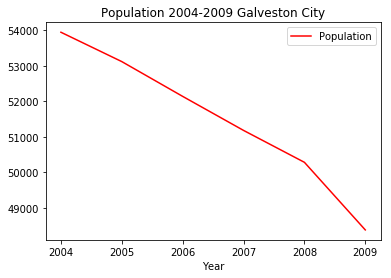

In [7]:
# Plot the graph
plot = galveston_df.plot(x='Year', y='Population', kind='line', title='Population 2004-2009 Galveston City', legend=True, color='red')

In [8]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('Population_2004-2009_Galveston_City.png')